In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def linear_transform(src, A):
    #Get the H(eight) and W(idth) of the source image 
    M,N = src.shape
    
    #For a linear transformation, we need to apply the following
    # g(x) = Af(x) + b
    #     where g is our output image
    #           f is our input image
    #           x is the pixel coordinate (x,y)
    #           b is the bias
    #           A is the affine transform matrix
    #np.mgrid will give us all the indices for the matrix, which
    #we flatten using reshape to size [2,all_pixels]
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    
    #Now we need to apply the transformation matrix A to each point
    # x' = a00 * x + a01 * y + a02
    # y' = a10 * x + a11 * y + a12
    # So we apply the dot product (this is < 3D so dot will give the
    # same result as matmul.
    # Since these are indices, they need to be integers! So let's round
    # the float values and convert to an integer
    # NOTE: This is will introduce error into our model, there are different
    #       ways to avoid this (like bilinear interopolation that we won't cover here)
    new_points = (A @ points).round().astype(np.int64)
    
    #The points are still is the shape [2, M*N] so so let's put it back
    #to the image coordinate space.  The order='F' command tells numpy to
    #reshape the matrix using Fortran memory allocation method (which is continguous).
    #This is what allows us to use single dimension indices properly
    x, y = new_points.reshape((2, M, N), order='F')
    #Convert the x,y coorindates to single indexes
    indices = x + N*y

    #Now, we'll return the contents of new ordering 
    #i.e. for pixel (x,y) we'll grab the pixel at (x',y') instead!
    #Now, because this is a simple example, we're not going to check for
    #out-of-bounds indexes, instead we'll just wrap around :)
    return np.take(src, indices, mode='wrap')


Now that we have our handy dandy function, let's use it!

Text(0.5,1,'original')

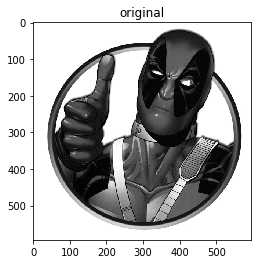

In [2]:
img = cv2.imread('deadpool.jpg', 0)
plt.imshow(img, cmap='gray')
plt.title("original")

[[1 0]
 [0 1]]


Text(0.5,1,'identity')

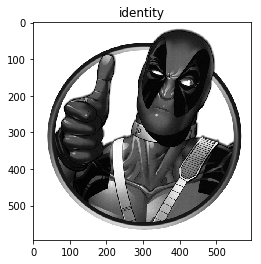

In [3]:
identity = np.array([1,0,0,1]).reshape((2,2))
print(identity)
plt.imshow(linear_transform(img, identity), cmap='gray')
plt.title("identity")

[[-1  0]
 [ 0  1]]


Text(0.5,1,'flip')

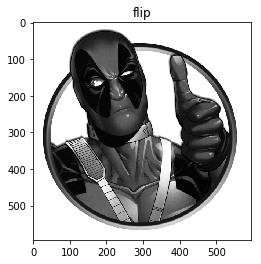

In [4]:
flip = np.array([-1,0,0,1]).reshape((2,2))
print(flip)
plt.imshow(linear_transform(img, flip), cmap='gray')
plt.title("flip")

[[10  0]
 [ 0 10]]


Text(0.5,1,'downscale')

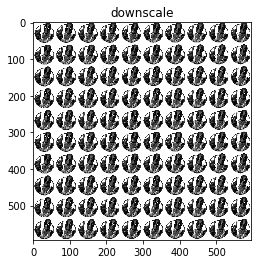

In [5]:
downscale = np.array([10,0,0,10]).reshape((2,2))
print(downscale)
plt.imshow(linear_transform(img, downscale), cmap='gray')
plt.title("downscale")

Text(0.5,1,'cropped')

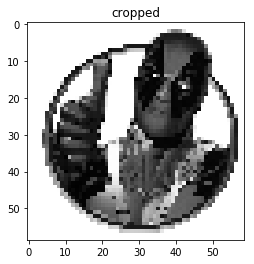

In [6]:
#Properly crop it
M,N = img.shape
img_scaled = linear_transform(img, downscale)
img_cropped = img_scaled[0:N//10, 0:M//10]
plt.imshow(img_cropped, cmap='gray')
plt.title("cropped")